In [441]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import networkx as nx
from tqdm import tqdm
from matplotlib.colors import ListedColormap
from itertools import count
import matplotlib as mpl
import pydot
import collections
from collections import Counter

# RAW

In [18]:
EPO_IPC = pd.read_csv('/Users/joebacchus/Desktop/Bartlett CASA/Data Original/Patent data/202001_EPO_IPC.txt',sep='|')
EPO_IPC

,appln_id,prio_year,app_year,IPC
0,1,1999,2000,G06K007/00
1,1,1999,2000,G06K017/00
2,1,1999,2000,G06K019/077
3,1,1999,2000,H01R012/18
4,1,1999,2000,H04M001/02
...,...,...,...,...
14184524,511943786,2019,2019,D04B027/26
14184525,511944146,2019,2019,D04B027/26
14184526,512029478,2019,2019,B01L003/00
14184527,512029478,2019,2019,B03C005/00


In [275]:
EPO_Patents = pd.read_csv('/Users/joebacchus/Desktop/Bartlett CASA/Data Original/Patent data/202001_EPO_Inventor_reg.txt',sep='|')
EPO_Patents

,app_nbr,appln_id,pub_nbr,person_id,inv_name,address,reg_code,ctry_code,reg_share,inv_share
0,EP20000103094,1,1037159,2,"Lipponen, Markku","Simo Kaarion katu 1 A 2,33720 Tampere",FI197,FI,1.0,0.250000
1,EP20000103094,1,1037159,3,"Laitinen, Timo","Peiponkatu 6,37830 Viiala",FI197,FI,1.0,0.250000
2,EP20000103094,1,1037159,4,"Aho, Ari","Elementinpolku 13 A 6,33720 Tampere",FI197,FI,1.0,0.250000
3,EP20000103094,1,1037159,5,"Knuutila, Jarno","Matti Tapion katu 1 F 17,33720 Tampere",FI197,FI,1.0,0.250000
4,EP20000107845,2,1024191,9,"Griffiths, Andrew David","28 Lilac Court, Cherry Hinton Road,Cambridge C...",UKH12,GB,1.0,0.166667
...,...,...,...,...,...,...,...,...,...,...
9182314,EP20190172049,511944146,3511460,69745810,"Brandl, Klaus","Wilhelmstr. 4,63512 Hainburg",DE71C,DE,1.0,0.500000
9182315,EP20190172049,511944146,3511460,69773942,"Schneider, Christian","Rasenheeg 3,36119 Neuhof",DE732,DE,1.0,0.500000
9182316,EP20190171783,512029478,3501658,69876717,"Chiu, Tzu-Keng","12F., No. 118, Touqian Rd., Xinzhuang Dist.,24...",TW000,TW,1.0,0.333333
9182317,EP20190171783,512029478,3501658,69903006,"Tseng, Huan-Yi","6F.-3, No. 7, Liyuan 1st St., Linkou Dist.,244...",TW000,TW,1.0,0.333333


In [30]:
EPO_Citations = pd.read_csv('/Users/joebacchus/Desktop/Bartlett CASA/Data Original/Citation data/202001_EPO_CITATIONS.txt',sep='|')
EPO_Citations['Cited_Appln_id'] = EPO_Citations['Cited_Appln_id'].fillna(0).astype(int)
EPO_Citations

,Citing_pub_nbr,Citing_pub_date,Citing_app_nbr,Citing_appln_id,Cited_pub_nbr,Cited_pub_date,Cited_App_auth,Cited_App_nbr,Cited_Appln_id,Cit_Total,Citn_origin,Citn_category,Citn_lag_year,Citn_lag_month,PCT_Route
0,EP0000001,19781220,EP19780200013,16428854,DE2161506,19730614.0,DE,DE2161506,9912741,7,SEA,NaN,5.0,66.0,0
1,EP0000001,19781220,EP19780200013,16428854,FR2025459,19700911.0,FR,FR6942154,19548401,7,SEA,NaN,8.0,99.0,0
2,EP0000001,19781220,EP19780200013,16428854,US3532159,19701006.0,US,US3532159D,49957875,7,SEA,NaN,8.0,98.0,0
3,EP0000001,19781220,EP19780200013,16428854,US3568762,19710309.0,US,US3568762D,50023219,7,SEA,NaN,7.0,93.0,0
4,EP0000001,19781220,EP19780200013,16428854,US3913665,19751021.0,US,US40265573,50609500,7,SEA,NaN,3.0,38.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13222449,EP3515163,20190724,EP20190159155,508236960,EP1701313,20060913.0,EP,EP20060076039,275377,4,SEA,A,13.0,154.0,0
13222450,EP3515163,20190724,EP20190159155,508236960,EP1993336,20081119.0,EP,EP20080156348,16424994,4,SEA,A,11.0,128.0,0
13222451,EP3515163,20190724,EP20190159155,508236960,US2006087823,20060427.0,US,US15134705,48199181,4,SEA,A,13.0,159.0,0
13222452,EP3515163,20190724,EP20190159155,508236960,US2006030171,20060209.0,US,US91058804,54106709,4,SEA,A,13.0,161.0,0


# Modified

In [42]:
EPO_Patents_PURE = EPO_Patents.loc[EPO_Patents['reg_share'] == 1] # Regional share is 1
EPO_Patents_PURE_GB = EPO_Patents_PURE.loc[EPO_Patents_PURE['ctry_code'] == 'GB'] # Region is also GB
EPO_Patents_CLEAN = EPO_Patents_PURE_GB[['appln_id','reg_code']].drop_duplicates()
EPO_Patents_CLEAN

,appln_id,reg_code
4,2,UKH12
206,85,UKH12
582,266,UKJ33
1269,589,UKH23
1276,590,UKH23
...,...,...
9182118,509041326,UKM34
9182119,509041326,UKM35
9182147,509176761,UKJ23
9182157,509176799,UKJ33


In [276]:
IPC_Patent_MERGE = EPO_Patents_CLEAN.merge(EPO_IPC, left_on='appln_id', right_on='appln_id')
IPC_Patent_MERGE # Info about each patent

,appln_id,reg_code,prio_year,app_year,IPC
0,2,UKH12,1991,1992,C07K014/00
1,2,UKH12,1991,1992,C07K016/00
2,2,UKH12,1991,1992,C07K016/18
3,2,UKH12,1991,1992,C07K016/24
4,2,UKH12,1991,1992,C07K016/26
...,...,...,...,...,...
1121908,509176761,UKJ23,2014,2015,H04R007/20
1121909,509176799,UKJ33,2013,2014,A61F013/00
1121910,509176799,UKJ33,2013,2014,A61F013/02
1121911,509176799,UKK21,2013,2014,A61F013/00


In [929]:
Patent_IDS = IPC_Patent_MERGE['appln_id'].unique() # All patent IDS with known information
Citations_CHECK = EPO_Citations[EPO_Citations['Citing_appln_id'].isin(Patent_IDS)]
Citations_READY = Citations_CHECK[Citations_CHECK['Cited_Appln_id'].isin(Patent_IDS)] 
edge_list = np.array(Citations_READY[['Cited_Appln_id','Citing_appln_id']]) # Edge list where only with known patents

In [930]:
edge_list = edge_list[:2000]
graph = nx.DiGraph()
graph.add_edges_from(edge_list)
len(edge_list)

2000

In [931]:
Patent_IPCS_FF = IPC_Patent_MERGE[IPC_Patent_MERGE['appln_id'].isin(list(graph.nodes()))]
Patent_IPCS_FF['IPC'] = Patent_IPCS_FF['IPC'].astype(str).str[:1] # Reduce IPC to 1 level
Patent_IPCS_FFD = Patent_IPCS_FF.drop(columns='reg_code').drop_duplicates() # FROM HERE NO LONGER CONSIDERING LOCATION

/var/folders/7f/r079rwbx56v6qwwwwxq2cpzw0000gn/T/ipykernel_70942/3248073279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Patent_IPCS_FF['IPC'] = Patent_IPCS_FF['IPC'].astype(str).str[:1] # Reduce IPC to 1 level


In [932]:
ID_TABLE = list(Patent_IPCS_FFD['appln_id'])
IPC_TABLE = []
for i in tqdm(range(len(Patent_IPCS_FFD))):
    current_IPCs = list(Patent_IPCS_FFD.loc[Patent_IPCS_FFD['appln_id'] == list(Patent_IPCS_FFD['appln_id'])[i]]['IPC'])
    IPC_TABLE.append(list(set(current_IPCs)))

IPC_TABLE = [''.join(sublist) for sublist in list(IPC_TABLE)] # Flatten

100%|█████████████████████████████████████| 3698/3698 [00:02<00:00, 1578.95it/s]


In [934]:
Attributes = dict(zip(ID_TABLE, IPC_TABLE))

nx.set_node_attributes(graph, Attributes, name="IPC")
labels = nx.get_node_attributes(graph,'IPC')

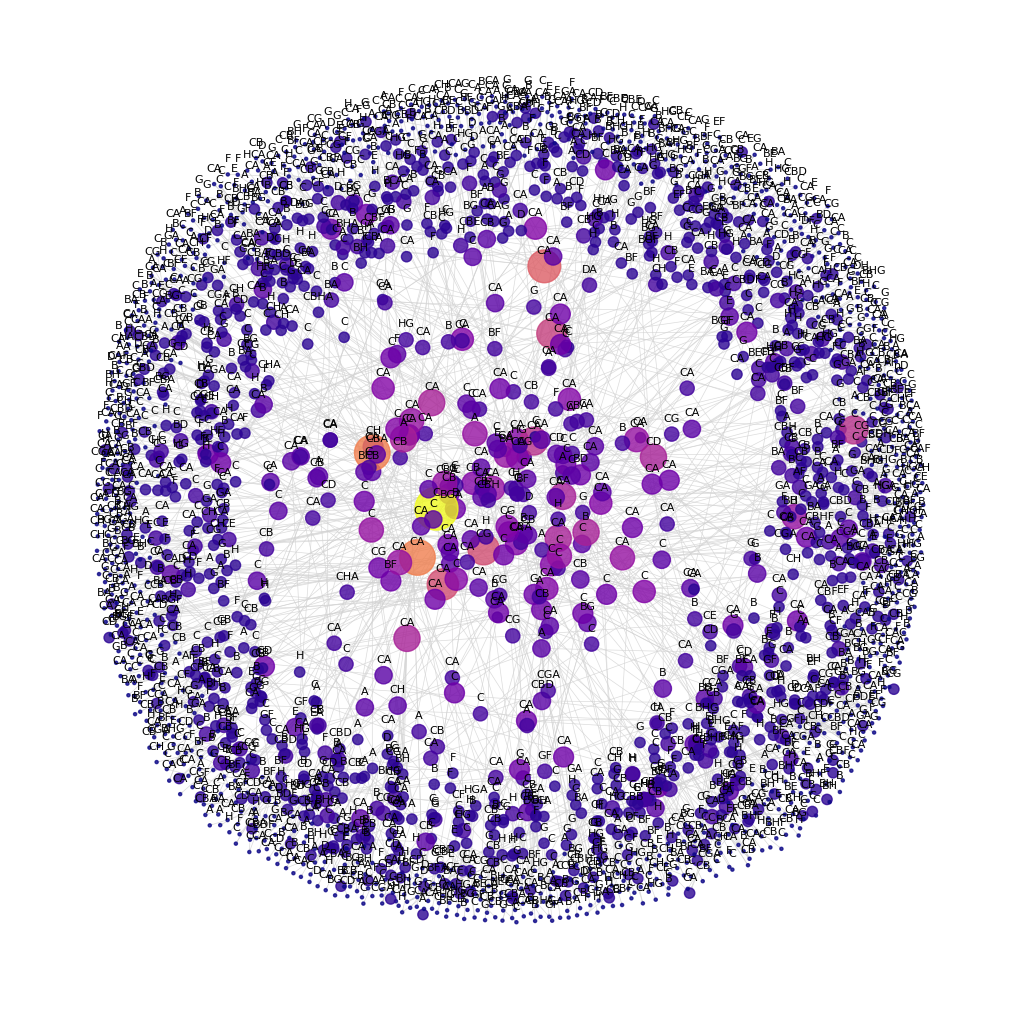

In [935]:
plt.figure(figsize=(10,10))

pos = nx.spring_layout(graph, scale=20)
cmap=plt.cm.plasma

def nudge(pos, x_shift, y_shift):
    return {n:(x + x_shift, y + y_shift) for n,(x,y) in pos.items()}
pos_nodes = nudge(pos, 0, 0.8) 

deg = dict(graph.out_degree())
nx.draw(graph, pos, node_size = [s*50+5 for s in deg.values()], edge_color='lightgrey', node_color=[s*200 for s in deg.values()], cmap=cmap, arrowsize=1, width=0.5,alpha=0.8)
nx.draw_networkx_labels(graph, pos_nodes, labels=labels, font_size=8, alpha=1) 

plt.axis('off')
plt.show()

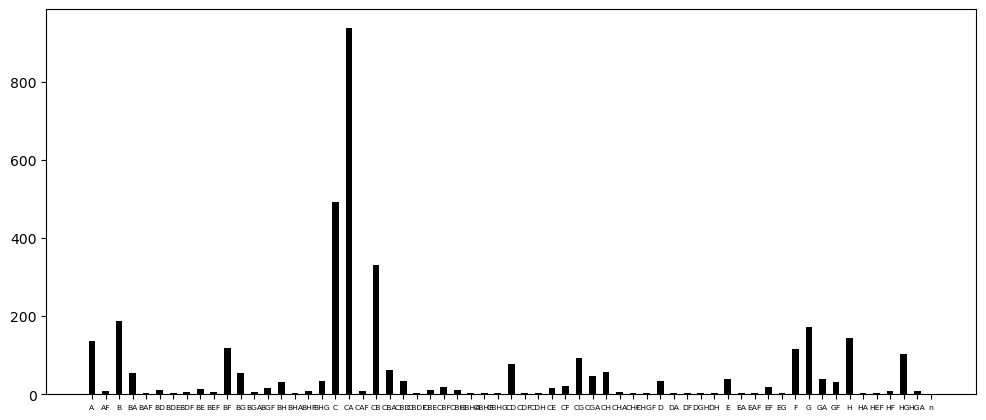

In [941]:
# Frequency of types

labels_count = Counter(sorted(IPC_TABLE))

plt.figure(figsize = (12,5))
plt.bar(labels_count.keys(), labels_count.values(), 0.5, color='k')
plt.xticks(fontsize=5.5)
plt.show()

In [937]:
forward_cit_count = (pd.DataFrame(sorted(list(graph.out_degree())),columns=[['ID','IN_DEGREE_COUNT']])).astype(int) # Actually in degree
backward_cit_count = (pd.DataFrame(sorted(list(graph.in_degree())),columns=[['ID','OUT_DEGREE_COUNT']])).astype(int) # Actually out degree

IPC_FCC = pd.DataFrame(list(Attributes.items()), columns=[['ID','IPC']])
IPC_FCC['ID'] = IPC_FCC['ID'].astype(int)

forward_cit_count['IPC'] = IPC_FCC['IPC']
backward_cit_count['IPC'] = IPC_FCC['IPC']

forward_cit_count_GEN = forward_cit_count.drop(columns=['ID'])
backward_cit_count_GEN = backward_cit_count.drop(columns=['ID'])

In [938]:
ALLOWED_IPC = list(set(list(Attributes.values()))) # All allowed IPC values

In [945]:
# Calculating average In Degree Count (IDC) and Out Degree Count (ODC) for IPCs

FCCarr = np.array([forward_cit_count_GEN])[0]
BCCarr = np.array([backward_cit_count_GEN])[0]

IPC_IDC = np.zeros(len(ALLOWED_IPC))
IPC_ODC = np.zeros(len(ALLOWED_IPC))

for i in tqdm(range(len(ALLOWED_IPC))):
    int_counter = FCCarr[np.where(FCCarr == ALLOWED_IPC[i])[0]][:,0]
    IPC_IDC[i] = np.sum(int_counter)/len(int_counter)
    int_counter = BCCarr[np.where(BCCarr == ALLOWED_IPC[i])[0]][:,0]
    IPC_ODC[i] = np.sum(int_counter)/len(int_counter)
    
av_IDC = dict(sorted(list(zip(ALLOWED_IPC,-IPC_IDC))))
av_ODC = dict(sorted(list(zip(ALLOWED_IPC,IPC_ODC))))
av_IOR = dict(sorted(list(zip(ALLOWED_IPC,IPC_ODC-IPC_IDC))))

100%|█████████████████████████████████████████| 63/63 [00:00<00:00, 3463.64it/s]


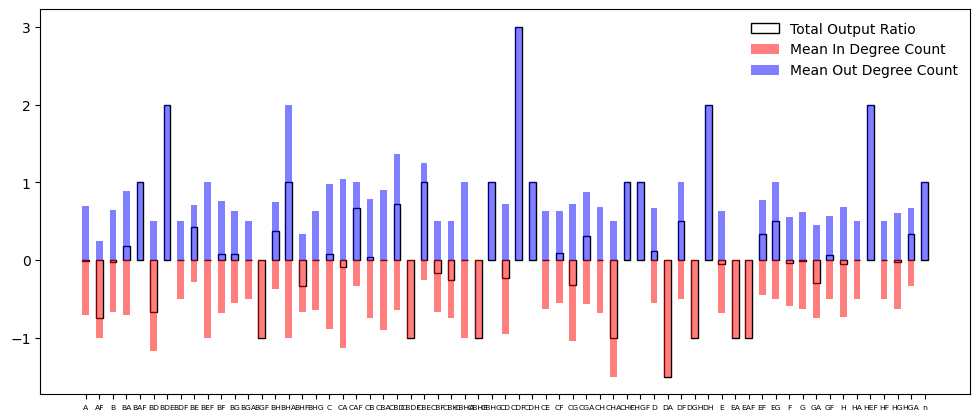

In [946]:
# IDC per CLASS

plt.figure(figsize = (12,5))
plt.bar(av_IOR.keys(), av_IOR.values(), 0.5, color='w',alpha=1,label='Total Output Ratio',edgecolor='black')
plt.bar(av_IDC.keys(), av_IDC.values(), 0.5, color='r',alpha=0.5,label='Mean In Degree Count')
plt.bar(av_ODC.keys(), av_ODC.values(), 0.5, color='b',alpha=0.5,label='Mean Out Degree Count')
plt.legend(frameon=False)
plt.xticks(fontsize=5.5)
plt.show()